### Test and find the best Model


Top 3 Classification Models:
Random Forest: Accuracy = 0.96
Naive Bayes: Accuracy = 0.96
SVM: Accuracy = 0.96


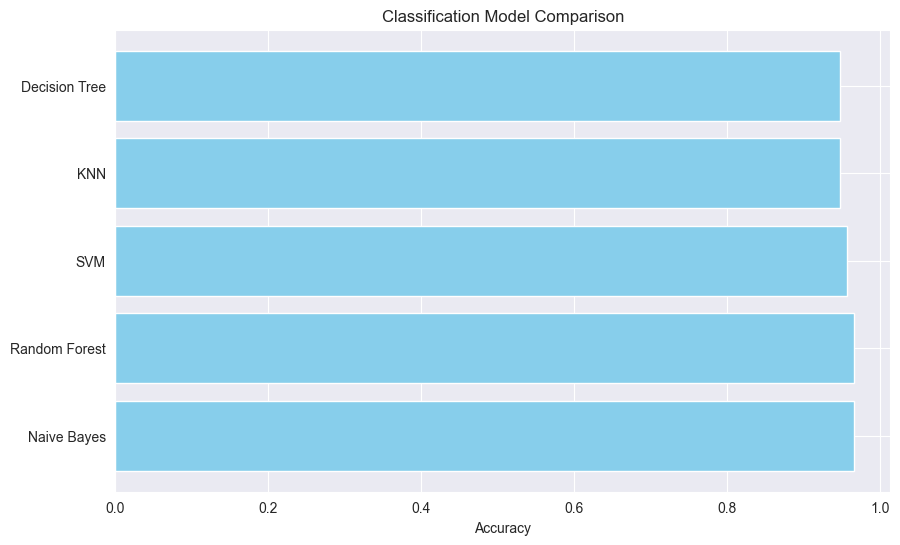

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

# Load data from CSV
file_path = "cleaned_dataset.csv"
df = pd.read_csv(file_path)

# Rename columns if needed
df.rename(columns={"diagnosis": "target"}, inplace=True)  # Rename 'diagnosis' to 'target' for consistency

# Encode the target variable ('diagnosis') to numerical (0 and 1)
df['target'] = df['target'].map({'M': 0, 'B': 1})  # M: malignant, B: benign

# Feature and Target
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (important for algorithms like SVM, KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define classifiers
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB()
}

# Generic function to evaluate models
def evaluate_models(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        results[name] = accuracy_score(y_test, predictions)
    return results

# Evaluate classifiers
classification_results = evaluate_models(classifiers, X_train_scaled, X_test_scaled, y_train, y_test)

# Top models
top_classification = sorted(classification_results.items(), key=lambda x: x[1], reverse=True)[:3]

# Display results
print("\nTop 3 Classification Models:")
for model, score in top_classification:
    print(f"{model}: Accuracy = {score:.2f}")

# Plot results
def plot_results(results, title, metric):
    sorted_results = dict(sorted(results.items(), key=lambda item: item[1]))
    models = list(sorted_results.keys())
    scores = list(sorted_results.values())
    
    plt.figure(figsize=(10, 6))
    plt.barh(models, scores, color='skyblue')
    plt.xlabel(metric)
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.show()

plot_results(classification_results, "Classification Model Comparison", "Accuracy")
